<a href="https://colab.research.google.com/github/zhaocaiQ/machine_learning_study/blob/master/9_3_LSTM%EA%B3%BC_GRU%EC%85%80(25%EA%B0%95).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LSTM신경망

In [18]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = imdb.load_data(
    num_words=500)

train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

#### 리뷰길이 100으로 맞추기

In [19]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

#### LSTM 셀을 사용한 순환층 만들기

In [20]:
from tensorflow import keras

model = keras.Sequential()

model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_3 (LSTM)               (None, 8)                 800       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


#### 모델 훈련하기

In [21]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', 
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 15s 42ms/step - loss: 0.6927 - accuracy: 0.5225 - val_loss: 0.6920 - val_accuracy: 0.5496
Epoch 2/100
313/313 [==============================] - 13s 41ms/step - loss: 0.6907 - accuracy: 0.5850 - val_loss: 0.6893 - val_accuracy: 0.5966
Epoch 3/100
313/313 [==============================] - 13s 41ms/step - loss: 0.6860 - accuracy: 0.6248 - val_loss: 0.6825 - val_accuracy: 0.6444
Epoch 4/100
313/313 [==============================] - 13s 41ms/step - loss: 0.6734 - accuracy: 0.6597 - val_loss: 0.6624 - val_accuracy: 0.6564
Epoch 5/100
313/313 [==============================] - 13s 41ms/step - loss: 0.6230 - accuracy: 0.6892 - val_loss: 0.5956 - val_accuracy: 0.7256
Epoch 6/100
313/313 [==============================] - 13s 41ms/step - loss: 0.5724 - accuracy: 0.7423 - val_loss: 0.5655 - val_accuracy: 0.7444
Epoch 7/100
313/313 [==============================] - 13s 41ms/step - loss: 0.5481 - accuracy: 0.7566 - val_loss: 0.5430 - val_ac

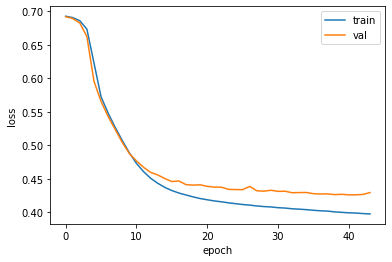

In [23]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

### 드롭아웃으로 과대적합 더 억제하기

In [24]:
model2 = keras.Sequential()

model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [25]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', 
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 16s 44ms/step - loss: 0.6924 - accuracy: 0.5385 - val_loss: 0.6913 - val_accuracy: 0.6082
Epoch 2/100
313/313 [==============================] - 13s 43ms/step - loss: 0.6884 - accuracy: 0.6342 - val_loss: 0.6823 - val_accuracy: 0.6408
Epoch 3/100
313/313 [==============================] - 13s 42ms/step - loss: 0.6534 - accuracy: 0.6654 - val_loss: 0.6187 - val_accuracy: 0.7120
Epoch 4/100
313/313 [==============================] - 13s 43ms/step - loss: 0.6127 - accuracy: 0.7124 - val_loss: 0.6000 - val_accuracy: 0.7202
Epoch 5/100
313/313 [==============================] - 13s 42ms/step - loss: 0.5937 - accuracy: 0.7252 - val_loss: 0.5864 - val_accuracy: 0.7262
Epoch 6/100
313/313 [==============================] - 13s 42ms/step - loss: 0.5811 - accuracy: 0.7355 - val_loss: 0.5711 - val_accuracy: 0.7482
Epoch 7/100
313/313 [==============================] - 13s 43ms/step - loss: 0.5670 - accuracy: 0.7447 - val_loss: 0.5590 - val_ac

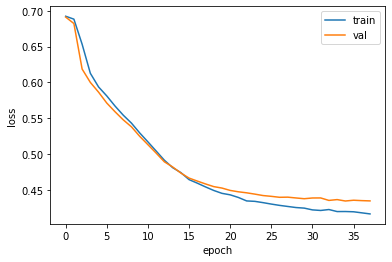

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# 순환층 쌓기(2개의 층 연결하기)

In [31]:
model3 = keras.Sequential()

model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

model3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_7 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_8 (LSTM)               (None, 8)                 544       
                                                                 
 dense_6 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [32]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy', 
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model3.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 30s 84ms/step - loss: 0.6928 - accuracy: 0.5248 - val_loss: 0.6924 - val_accuracy: 0.5474
Epoch 2/100
313/313 [==============================] - 25s 80ms/step - loss: 0.6903 - accuracy: 0.5749 - val_loss: 0.6871 - val_accuracy: 0.6504
Epoch 3/100
313/313 [==============================] - 25s 80ms/step - loss: 0.6681 - accuracy: 0.6748 - val_loss: 0.6297 - val_accuracy: 0.6896
Epoch 4/100
313/313 [==============================] - 25s 80ms/step - loss: 0.5839 - accuracy: 0.7128 - val_loss: 0.5517 - val_accuracy: 0.7368
Epoch 5/100
313/313 [==============================] - 25s 81ms/step - loss: 0.5376 - accuracy: 0.7439 - val_loss: 0.5101 - val_accuracy: 0.7640
Epoch 6/100
313/313 [==============================] - 25s 81ms/step - loss: 0.5032 - accuracy: 0.7624 - val_loss: 0.4929 - val_accuracy: 0.7644
Epoch 7/100
313/313 [==============================] - 25s 81ms/step - loss: 0.4850 - accuracy: 0.7743 - val_loss: 0.4718 - val_ac

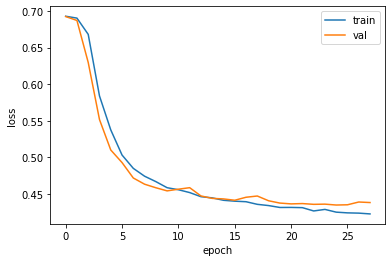

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# GRU 신경망

In [34]:
model4 = keras.Sequential()

model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

model4.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


In [35]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy', 
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model4.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 16s 46ms/step - loss: 0.6928 - accuracy: 0.5132 - val_loss: 0.6921 - val_accuracy: 0.5216
Epoch 2/100
313/313 [==============================] - 14s 45ms/step - loss: 0.6904 - accuracy: 0.5584 - val_loss: 0.6894 - val_accuracy: 0.5532
Epoch 3/100
313/313 [==============================] - 14s 45ms/step - loss: 0.6866 - accuracy: 0.5856 - val_loss: 0.6851 - val_accuracy: 0.5788
Epoch 4/100
313/313 [==============================] - 14s 44ms/step - loss: 0.6806 - accuracy: 0.6108 - val_loss: 0.6782 - val_accuracy: 0.5986
Epoch 5/100
313/313 [==============================] - 14s 45ms/step - loss: 0.6709 - accuracy: 0.6281 - val_loss: 0.6673 - val_accuracy: 0.6164
Epoch 6/100
313/313 [==============================] - 14s 46ms/step - loss: 0.6559 - accuracy: 0.6430 - val_loss: 0.6503 - val_accuracy: 0.6340
Epoch 7/100
313/313 [==============================] - 14s 46ms/step - loss: 0.6328 - accuracy: 0.6638 - val_loss: 0.6240 - val_ac

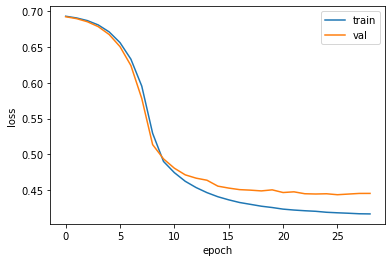

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## LSTM 2개의 순환층을 쌓고 드롭아웃을 사용한 모델을 다시 로드하여 테스트 세트에 대한 성능을 확인해봄

In [37]:
test_seq = pad_sequences(test_input, maxlen=100)

rnn_model = keras.models.load_model('best-2rnn-model.h5')

rnn_model.evaluate(test_seq, test_target)

782/782 [==============================] - 12s 14ms/step - loss: 0.4293 - accuracy: 0.7999


[0.4293322265148163, 0.7998800277709961]